In [1]:
import pandas as pd
from datetime import datetime, date, timedelta, time
import seaborn as sns
import pickle
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
with open('./data/full_df.bin', 'rb') as f:
    df = pickle.load(f)

In [3]:
with open('./data/df_no_transition.bin', 'rb') as f:
    df_no_transition = pickle.load(f)

In [4]:
df.head()

,customer_no,timestamp,before,shopping_duration,after,first_or_following,hour
0,mon_1,2019-09-02 07:03:00,dairy,120,dairy,first,7
1,mon_1,2019-09-02 07:04:00,dairy,120,checkout,following,7
2,mon_1,2019-09-02 07:05:00,checkout,120,NaN,following,7
3,mon_2,2019-09-02 07:03:00,dairy,180,dairy,first,7
4,mon_2,2019-09-02 07:04:00,dairy,180,dairy,following,7


In [5]:
df.tail()

,customer_no,timestamp,before,shopping_duration,after,first_or_following,hour
53926,fri_1503,2019-09-06 21:55:00,checkout,480,NaN,following,21
53927,fri_1505,2019-09-06 21:55:00,checkout,420,NaN,following,21
53928,fri_1506,2019-09-06 21:55:00,checkout,420,NaN,following,21
53929,fri_1509,2019-09-06 21:55:00,checkout,300,NaN,following,21
53930,fri_1510,2019-09-06 21:55:00,checkout,300,NaN,following,21


In [6]:
print(f"The dataframe consists of {df.shape[0]} records in total")

The dataframe consists of 53931 records in total


In [7]:
print(f"There are {df['customer_no'].nunique()} unique customers")

There are 7445 unique customers


In [8]:
df_checkout = df[df["before"] == "checkout"]
print(f"The average customer stays {int(df_checkout['shopping_duration'].mean())} seconds in the supermarket")

The average customer stays 375 seconds in the supermarket


In [9]:
visited_areas = df_no_transition.groupby("customer_no")["location"].count()
print(f"The average customer visits {round(visited_areas.mean(), 1)} areas in the supermarket")

The average customer visits 3.3 areas in the supermarket


In [10]:
print(f" On average a customer remains {round(round(df_checkout['shopping_duration'].mean(), 1) / round(visited_areas.mean(), 1), 1)} seconds in one area.")

 On average a customer remains 113.8 seconds in one area.


### 1. Calculate the total number of customers in each section

In [11]:
df_without_checkout = df[df['before'] != "checkout"]

df_without_checkout.shape

(46486, 7)

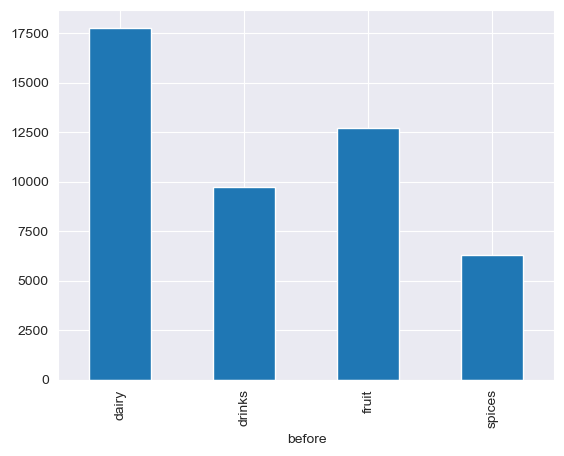

In [12]:
df_without_checkout.groupby(["before"])["timestamp"].count().plot(kind='bar');

### 2. Calculate the total number of customers in each section over time

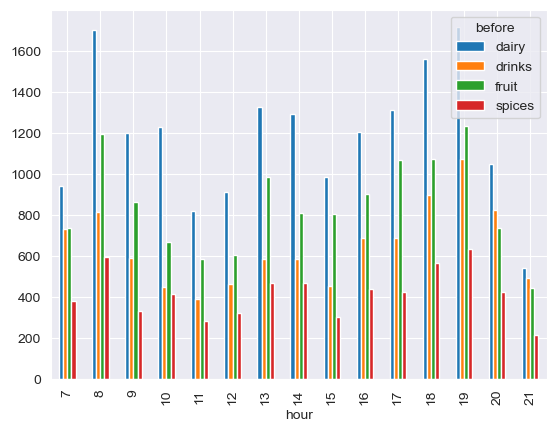

In [13]:
df_without_checkout.groupby(["hour", "before"])["timestamp"].count().unstack().plot(kind='bar');

### 3. Display the number of customers at checkout over time

In [14]:
df_only_checkout = df[df['before'] == "checkout"]

df_only_checkout.shape

(7445, 7)

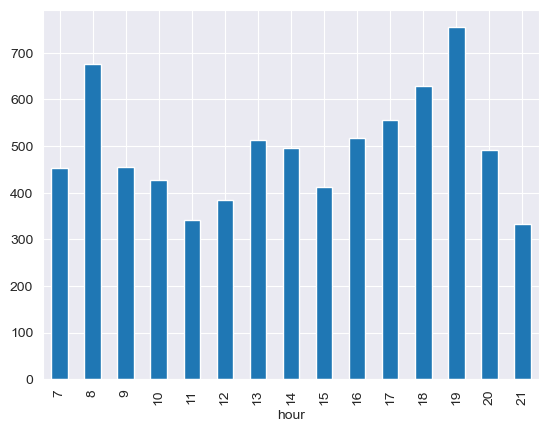

In [15]:
df_only_checkout.groupby(["hour"])["timestamp"].count().plot(kind='bar');

### 4. Calculate the time each customer spent in the market

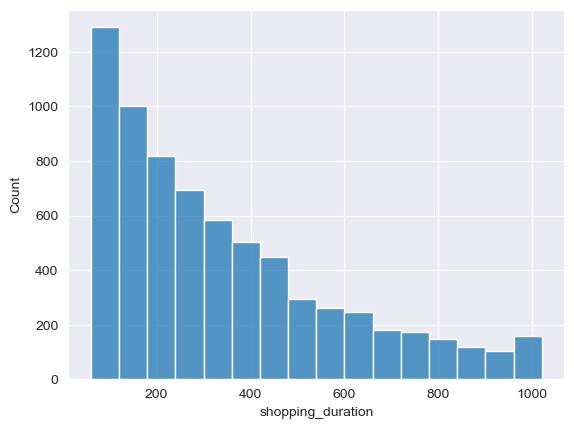

In [16]:
sns.histplot(data=df_only_checkout, x="shopping_duration", binwidth=60, binrange=[60, 1000]);

### 5. Calculate the total number of customers in the supermarket over time.

Is that not the same question as No. 3?

### 6. Plot the distribution of customers of their first visited section versus following sections

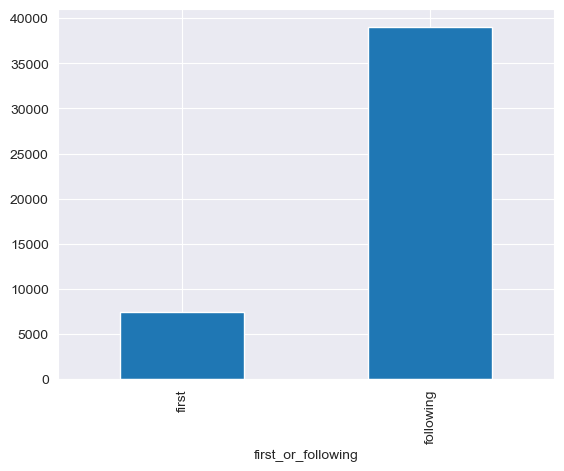

In [17]:
df_without_checkout.groupby(["first_or_following"])["timestamp"].count().plot(kind='bar');

**Observation:**
- The average customer visits approximately 2.5 areas in our supermarket (checkout NOT included)

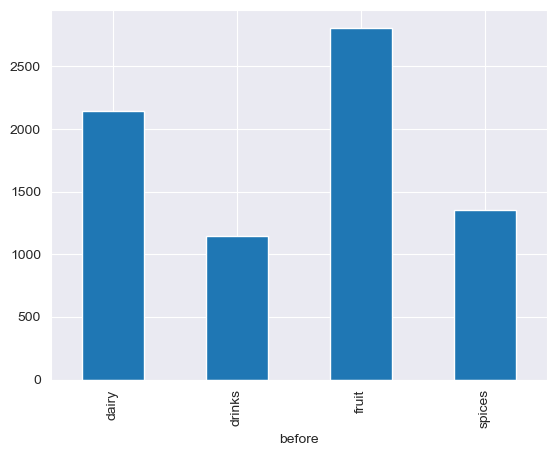

In [18]:
mask = df_without_checkout["first_or_following"] == "first"

df_without_checkout[mask].groupby("before")["timestamp"].count().plot(kind='bar');

**Observation:**
- People have a clear tendency towards 'fruit' and 'dairy' as their first area